## Special Topics in Artificial Intelligence and Deep Learning (SCIFM0002)

### **Programming Project 2 - Dunking Biscuits in Tea**

#### Exploratory Data Analysis

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### *"Big Data" Collection*

In [77]:
dunking_df = pd.read_csv('data/dunking-data.csv')
dunking_df.head()

,gamma,phi,eta,L,t,biscuit
0,0.073897,1.333006,0.000999,0.011196,19.362214,Digestive
1,0.080946,1.476758,0.001012,0.005894,11.852589,Digestive
2,0.087408,1.477141,0.000984,0.009249,24.793669,Digestive
3,0.070793,1.502001,0.001002,0.003774,16.292780,Hobnob
4,0.058917,1.548274,0.001004,0.002291,13.662271,Hobnob


In [78]:
# exploring distribution of biscuit types
dunking_df['biscuit'].value_counts()

biscuit
Digestive    1000
Hobnob       1000
Rich Tea     1000
Name: count, dtype: int64

*Gamma* represents the surface tension of tea (N m<sup>-1</sup>), *phi* the contact angle between the biscuit and surface (rad), *eta* the tea dynamic viscosity (Pa s), *L* the distance up the biscuit that the tea was visible (m) and *t* the time after initial dunking that the measurement was made (s). *Biscuit* is a ternary variable representing biscuit type (digestive, hobnob or rich tea).

There are 3000 datapoints, and no missing values. There are 1000 datapoints for each biscuit, meaning an even distribution. Therefore, no readjustment of class balances is required.

##### **Variable Distributions**

Text(0.5, 1.01, 'Dunking data distribution')

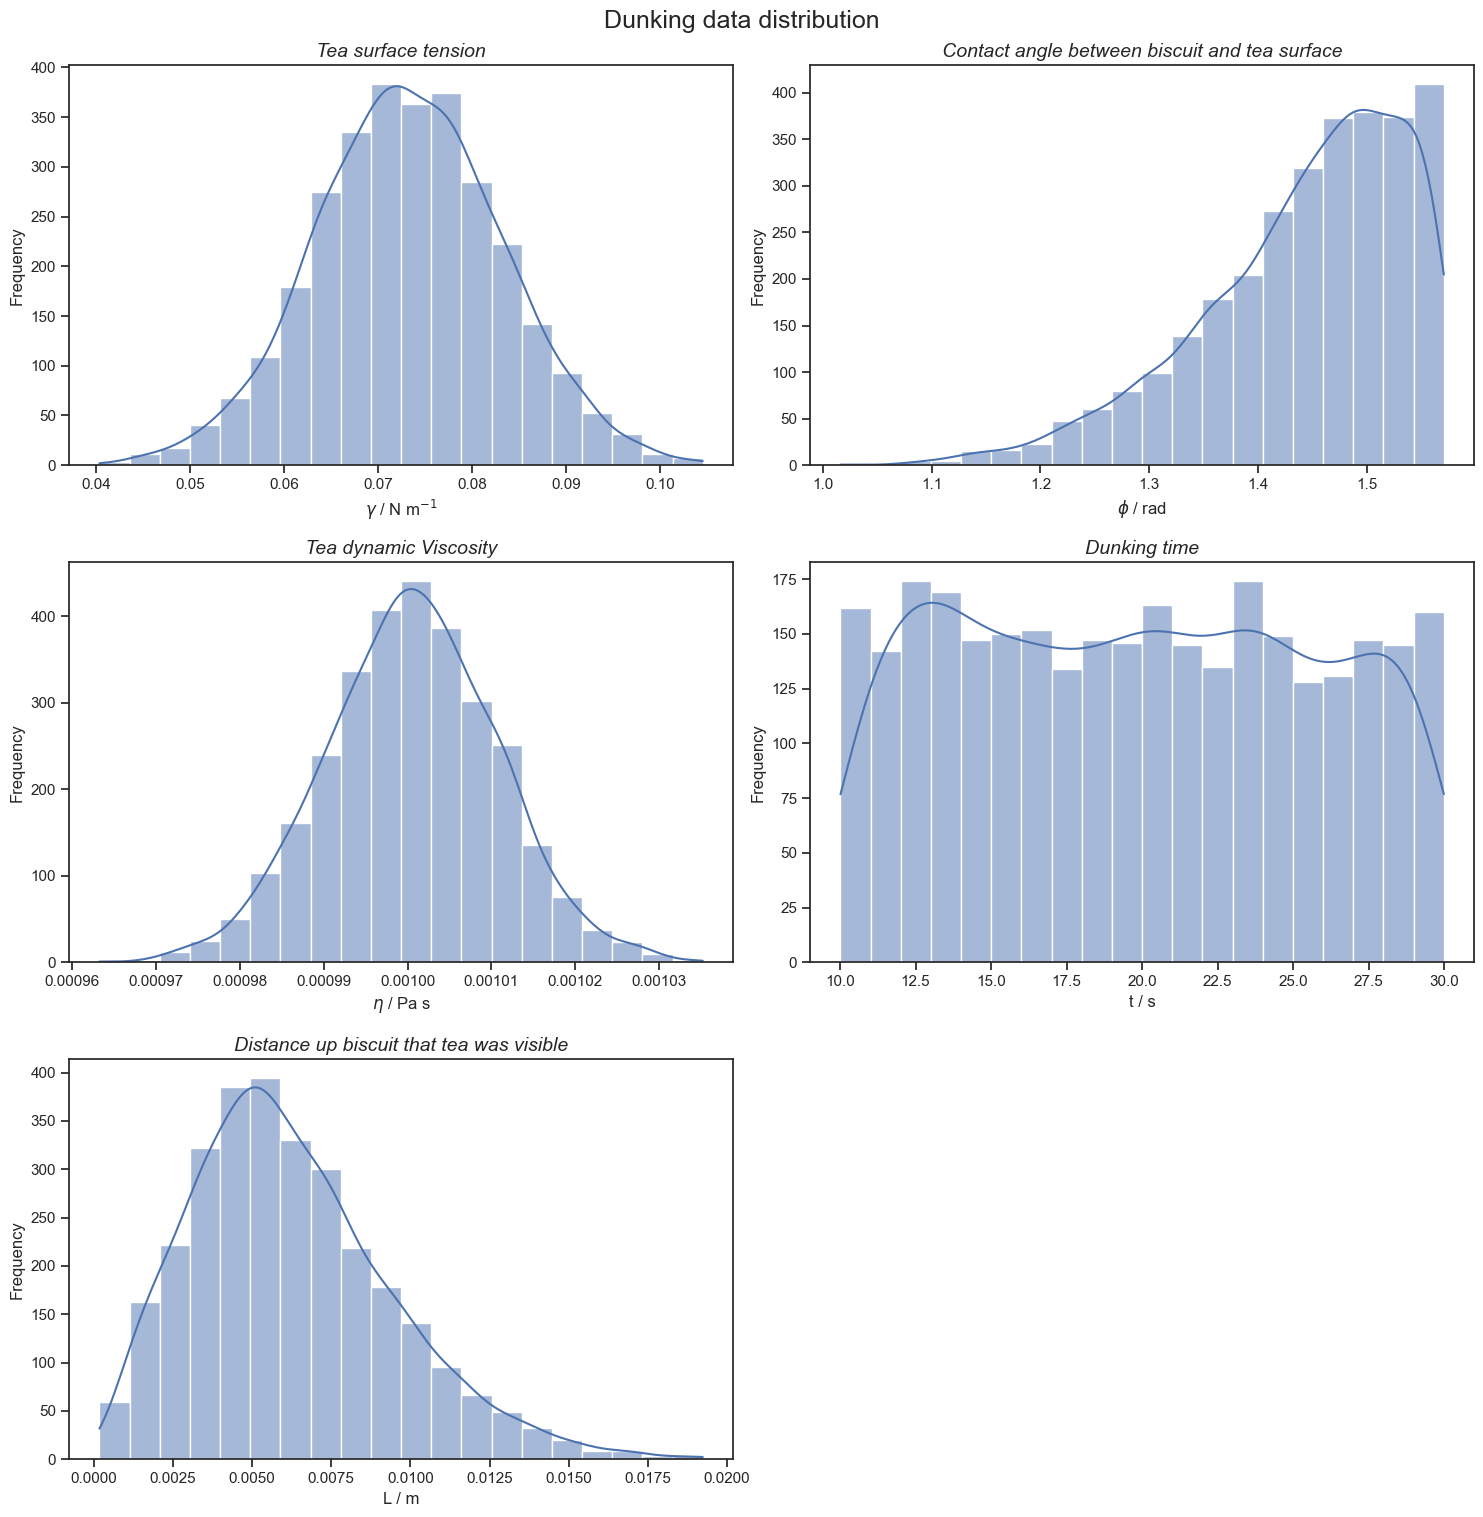

In [79]:
# exploring distribution of gamma (surface tension)
fig, ax = plt.subplots(3,2,figsize=(15,15))
sns.set_theme(style='ticks', font='Arial')

sns.histplot(data=dunking_df, x='gamma', bins=20, kde=True, ax=ax[0,0])
ax[0,0].set_title('Tea surface tension', fontsize=14, fontstyle='italic')
ax[0,0].set_xlabel(r'$\gamma$ / N m$^{-1}$', fontsize=12)
ax[0,0].set_ylabel('Frequency', fontsize=12)

sns.histplot(data=dunking_df, x='phi', bins=20, kde=True, ax=ax[0,1])
ax[0,1].set_title('Contact angle between biscuit and tea surface', fontsize=14, fontstyle='italic')
ax[0,1].set_xlabel(r'$\phi$ / rad', fontsize=12)
ax[0,1].set_ylabel('Frequency', fontsize=12)

sns.histplot(data=dunking_df, x='eta', bins=20, kde=True, ax=ax[1,0])
ax[1,0].set_title('Tea dynamic Viscosity', fontsize=14, fontstyle='italic')
ax[1,0].set_xlabel(r'$\eta$ / Pa s', fontsize=12)
ax[1,0].set_ylabel('Frequency', fontsize=12)

sns.histplot(data=dunking_df, x='t', bins=20, kde=True, ax=ax[1,1])
ax[1,1].set_title('Dunking time', fontsize=14, fontstyle='italic')
ax[1,1].set_xlabel('t / s', fontsize=12)
ax[1,1].set_ylabel('Frequency', fontsize=12)

sns.histplot(data=dunking_df, x='L', bins=20, kde=True, ax=ax[2,0])
ax[2,0].set_title('Distance up biscuit that tea was visible', fontsize=14, fontstyle='italic')
ax[2,0].set_xlabel('L / m', fontsize=12)
ax[2,0].set_ylabel('Frequency', fontsize=12)

# removing axes from subplot at bottom right
ax[2,1].axis('off')

fig.tight_layout()
fig.suptitle('Dunking data distribution', fontsize=18, y=1.01)

The above plots give information about the distribution of the 5 continuous variables in the big dataset. *t* ranges from 10 to 30 seconds, and shows a reasonably consistent distribution across this range. *Gamma* and *eta* show clear gaussian distributions. *L* also shows a gaussian distribution, but with a skew towards lower values (positive skew). Given that the data contains distances for three biscuit types that likely have different properties, this is justifiable; it could be suggesting that one biscuit type reaches larger values of *L* than the other two, which are quite similar.

*Phi* shows a significant skew towards larger values (negative skew). This was unexpected so was explored further.

In [80]:
# finding maximum angle measured
phi_max = dunking_df['phi'].max()
phi_max_degrees = phi_max * (180/np.pi)

print(f'Maximum angle recorded = {phi_max:.3f} rad = {phi_max_degrees:.3f} °')

Maximum angle recorded = 1.571 rad = 89.990 °


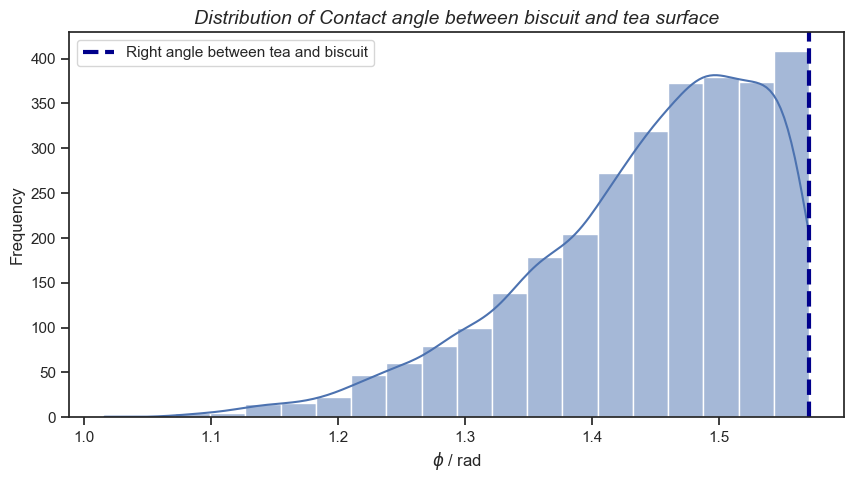

In [81]:
fig, ax = plt.subplots(figsize=(10,5))
sns.set_theme(style='ticks', font='Arial')

sns.histplot(data=dunking_df, x='phi', bins=20, kde=True, ax=ax)

# adding a vertical line at 90 degrees
ax.axvline(x=(90*(np.pi/180)), label='Right angle between tea and biscuit', linewidth=3, linestyle='--', color='darkblue')

ax.set_title('Distribution of Contact angle between biscuit and tea surface', fontsize=14, fontstyle='italic')
ax.set_xlabel(r'$\phi$ / rad', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.legend()

No results above 90° are recorded. This value represents a perfect right angle between the biscuit and the tea, and so is when the biscuit is perfectly upright. Therefore, the measurements are not being taken from a certain direction, but rather the acute angle is always considered. If this were not the case, a regular gaussian distribution would likely be seen, as is seen for *gamma* and *eta*.

##### **Variable Correlation**

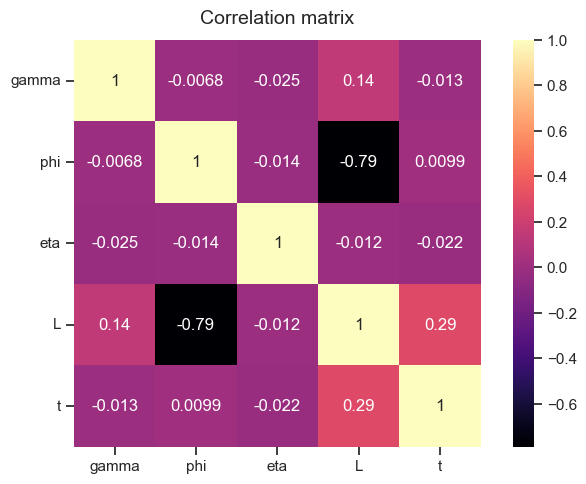

In [82]:
# exploring correlation between variables
dunking_numerical = dunking_df.drop(columns='biscuit')
corr = dunking_numerical.corr()

fig, ax = plt.subplots(figsize=(7,5))
sns.set_theme(style='ticks', font='Arial')

sns.heatmap(corr, annot=True, cmap='magma', square=True)
ax.set_title('Correlation matrix', fontsize=14, y=1.02)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

fig.tight_layout()

The correlation matrix shows there to be a significant negative correlation between *phi* and *L*. There is also a noteable correlation between *L* and *t*. There are however no clear relationships between the rest of the variables.

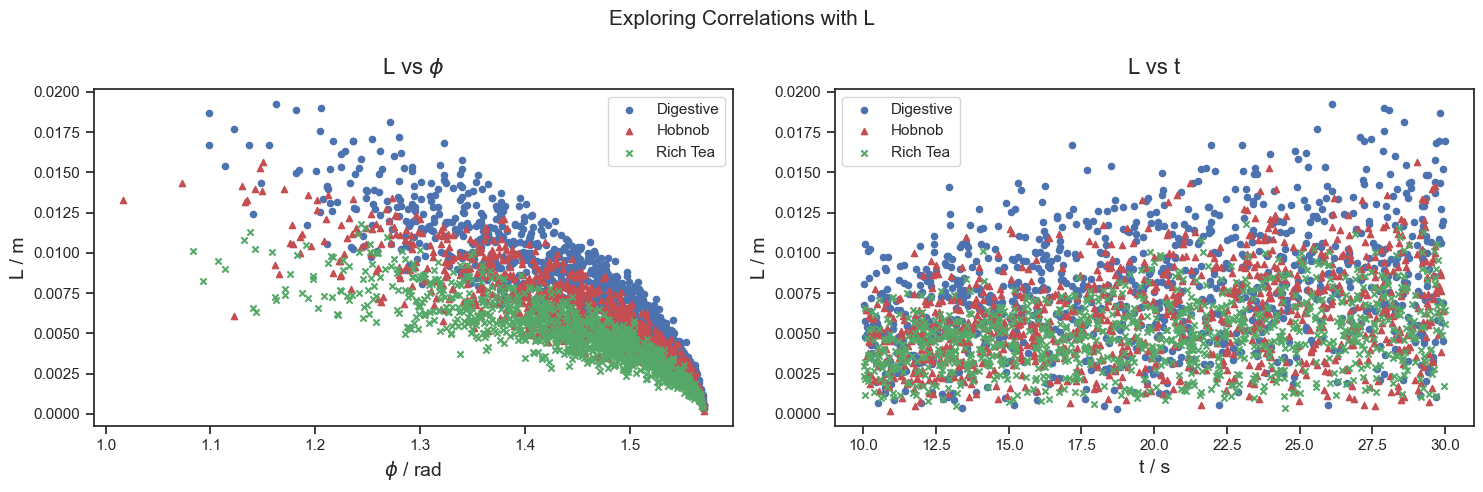

In [83]:
# plotting L vs phi and L vs t
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.set_theme(style='ticks', font='Arial')

# phi v L
axes[0].scatter(x=dunking_df['phi'].where(dunking_df['biscuit']=='Digestive'), y=dunking_df['L'].where(dunking_df['biscuit']=='Digestive'),
              marker='o', c='b', s=20, label='Digestive')

axes[0].scatter(x=dunking_df['phi'].where(dunking_df['biscuit']=='Hobnob'), y=dunking_df['L'].where(dunking_df['biscuit']=='Hobnob'),
              marker='^', c='r', s=20, label='Hobnob')

axes[0].scatter(x=dunking_df['phi'].where(dunking_df['biscuit']=='Rich Tea'), y=dunking_df['L'].where(dunking_df['biscuit']=='Rich Tea'),
              marker='x', c='g', s=20, label='Rich Tea')

axes[0].set_title('L vs $\phi$', fontsize=16, y=1.02)
axes[0].set_xlabel(r'$\phi$ / rad', fontsize=14)


# t v L
axes[1].scatter(x=dunking_df['t'].where(dunking_df['biscuit']=='Digestive'), y=dunking_df['L'].where(dunking_df['biscuit']=='Digestive'),
              marker='o', c='b', s=20, label='Digestive')

axes[1].scatter(x=dunking_df['t'].where(dunking_df['biscuit']=='Hobnob'), y=dunking_df['L'].where(dunking_df['biscuit']=='Hobnob'),
              marker='^', c='r', s=20, label='Hobnob')

axes[1].scatter(x=dunking_df['t'].where(dunking_df['biscuit']=='Rich Tea'), y=dunking_df['L'].where(dunking_df['biscuit']=='Rich Tea'),
              marker='x', c='g', s=20, label='Rich Tea')

axes[1].set_title('L vs t', fontsize=16, y=1.02)
axes[1].set_xlabel('t / s', fontsize=14)


for ax in axes:
    ax.legend()
    ax.set_ylabel('L / m', fontsize=14)


fig.suptitle('Exploring Correlations with L', fontsize=15)
fig.tight_layout()

The *L* versus *phi* plot shows a negative relationship, as expected by the correlation coefficient. The three biscuit types are distinguishable, with digestives generally producing a larger *L* for a given *phi*.

The *L* versus *t* plot is more chaotic, with biscuit types showing a lot of overlap. At the highest *L* values, the weak positive correlation is clearest. This relationship would likely be more obvious when dealing with a larger range of *t*.

##### **Exploring Distribution of L Across Biscuit Types**

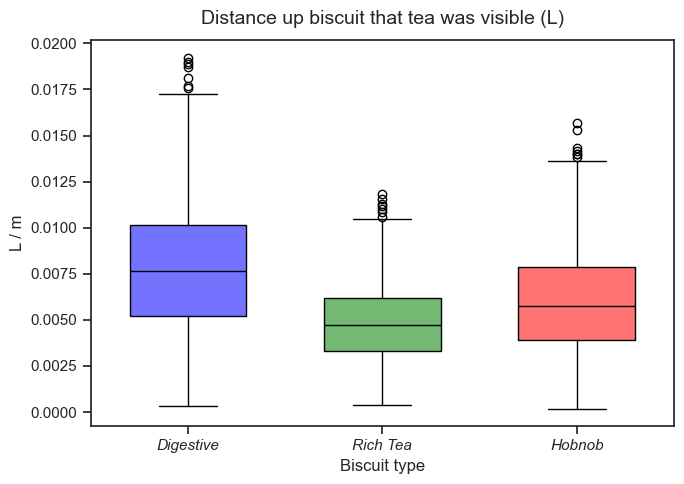

In [84]:
# box plots of L for each biscuit type
fig, ax = plt.subplots(figsize=(7,5))
sns.set_theme(style='ticks', font='Arial')

boxes = [
    dunking_df[dunking_df['biscuit'] == 'Digestive']['L'],
    dunking_df[dunking_df['biscuit'] == 'Rich Tea']['L'],
    dunking_df[dunking_df['biscuit'] == 'Hobnob']['L']
]

box_colors = [(0, 0, 1, 0.55),  # blue for digestive
              (0, 0.5, 0, 0.55),  # green for rich tea
              (1, 0, 0, 0.55)]  # red for hobnob


boxplot = ax.boxplot(boxes, positions=[1, 2, 3], patch_artist=True, widths=0.6)

for patch, color in zip(boxplot['boxes'], box_colors):
    patch.set_facecolor(color)

# setting median line to black for easier visualisation
for median in boxplot['medians']:
    median.set(color='black', linewidth=1)

ax.set_title('Distance up biscuit that tea was visible (L)', fontsize=14, y=1.02)
ax.set_xlabel('Biscuit type', fontsize=12)
ax.set_xticklabels(['Digestive', 'Rich Tea', 'Hobnob'], fontstyle='italic')
ax.set_ylabel('L / m', fontsize=12)

fig.tight_layout()

The box plot shows that the digestive has a wider range of *L* values and exhibits higher averages. The hobnob has the next highest average, followed by the rich tea. These data confirms the initial thought that there was an imbalance in *L* values; digestives tend to have higher values of *L*, whilst there is a reasonable overlap between rich tea and hobnob.

#### *Time-Resolved Measurements*

In [85]:
tr1 = pd.read_csv('data/tr-1.csv')
tr2 = pd.read_csv('data/tr-2.csv')
tr3 = pd.read_csv('data/tr-3.csv')

tr1.head()

,t,L,dL
0,30.000000,0.008087,0.000392
1,32.727273,0.008253,0.000270
2,35.454545,0.008607,0.000501
3,38.181818,0.008920,0.000267
4,40.909091,0.009604,0.000274


In [86]:
# calculating correlation between L and t for each trial
trs = [tr1, tr2, tr3]
correlations = []

for tr in trs:
    correlation = tr['L'].corr(tr['t'])
    correlations.append(correlation)

print(f"Correlation between L and t for trial 1: {correlations[0]:.3f}")
print(f"Correlation between L and t for trial 2: {correlations[1]:.3f}")
print(f"Correlation between L and t for trial 3: {correlations[2]:.3f}")

Correlation between L and t for trial 1: 0.990
Correlation between L and t for trial 2: 0.991
Correlation between L and t for trial 3: 0.991


The above correlation coefficients show that there is a very strong positive correlation between *t* and *L*. This is expected, given the nature of the variables, and the greater range of *t* values than is observed in the big dataset.

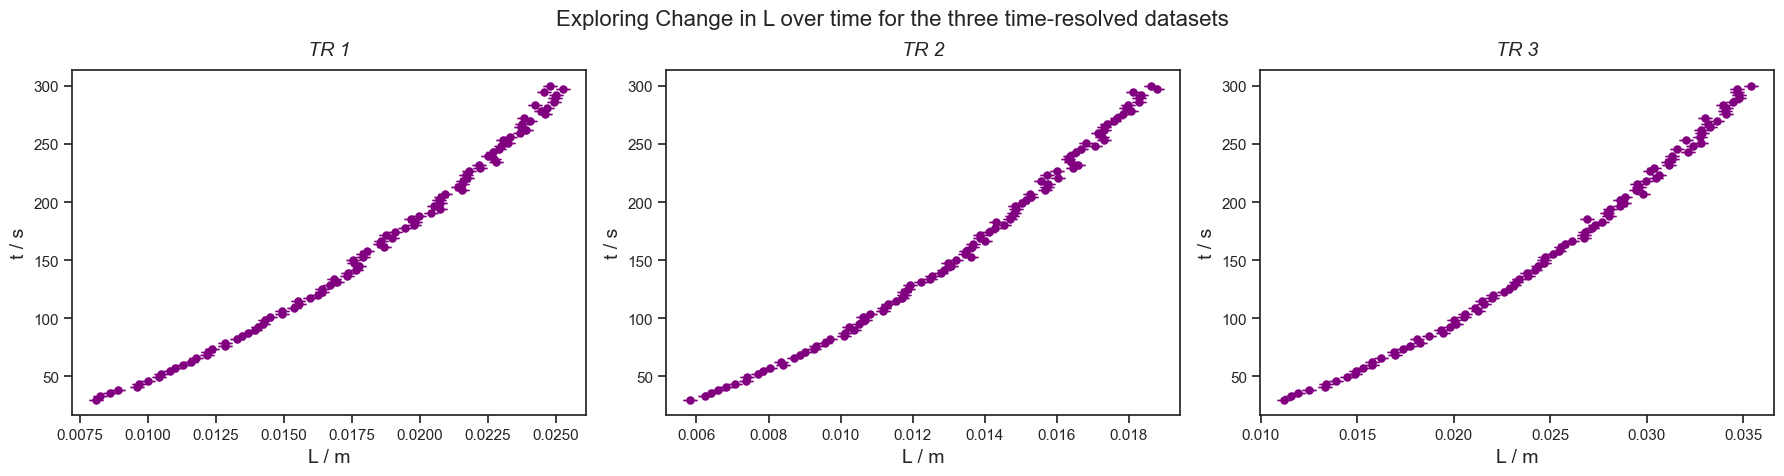

In [94]:
# plotting L vs t for each trial, adding error bars representing the dL (uncertainty in L)
fig, ax = plt.subplots(1,3, figsize=(18,5))
sns.set_theme(style='ticks', font='Arial')

for i, tr in enumerate([tr1, tr2, tr3]):
    sns.scatterplot(data=tr, x='L', y='t', ax=ax[i], c='purple')
    ax[i].errorbar(tr['L'], tr['t'], yerr=tr['dL'], fmt='o', capsize=5, markersize=5, c='purple')
    ax[i].set_title(f'TR {i+1}', fontsize=14, y=1.02, fontstyle='italic')
    ax[i].set_xlabel('L / m', fontsize=14)
    ax[i].set_ylabel('t / s', fontsize=14)

fig.suptitle('Exploring Change in L over time for the three time-resolved datasets', fontsize=16, y=0.95)
fig.tight_layout()

#### *Microscopy Measurements*

In [88]:
microscopy_df = pd.read_csv('data/microscopy-data.csv')

microscopy_df.head()

,gamma,phi,eta,L,t,r
0,0.084596,1.557367,0.000981,0.003221,24.231107,7.453712e-07
1,0.064291,1.538842,0.000998,0.002395,22.169765,2.600680e-07
2,0.086224,1.546138,0.001008,0.003036,23.257709,3.734618e-07
3,0.082859,1.566878,0.000997,0.001261,12.717432,7.567173e-07
4,0.090832,1.570229,0.001002,0.000576,15.189146,8.239067e-07


Text(0.5, 1.01, 'Dunking data distribution - Micrscopy Dataset')

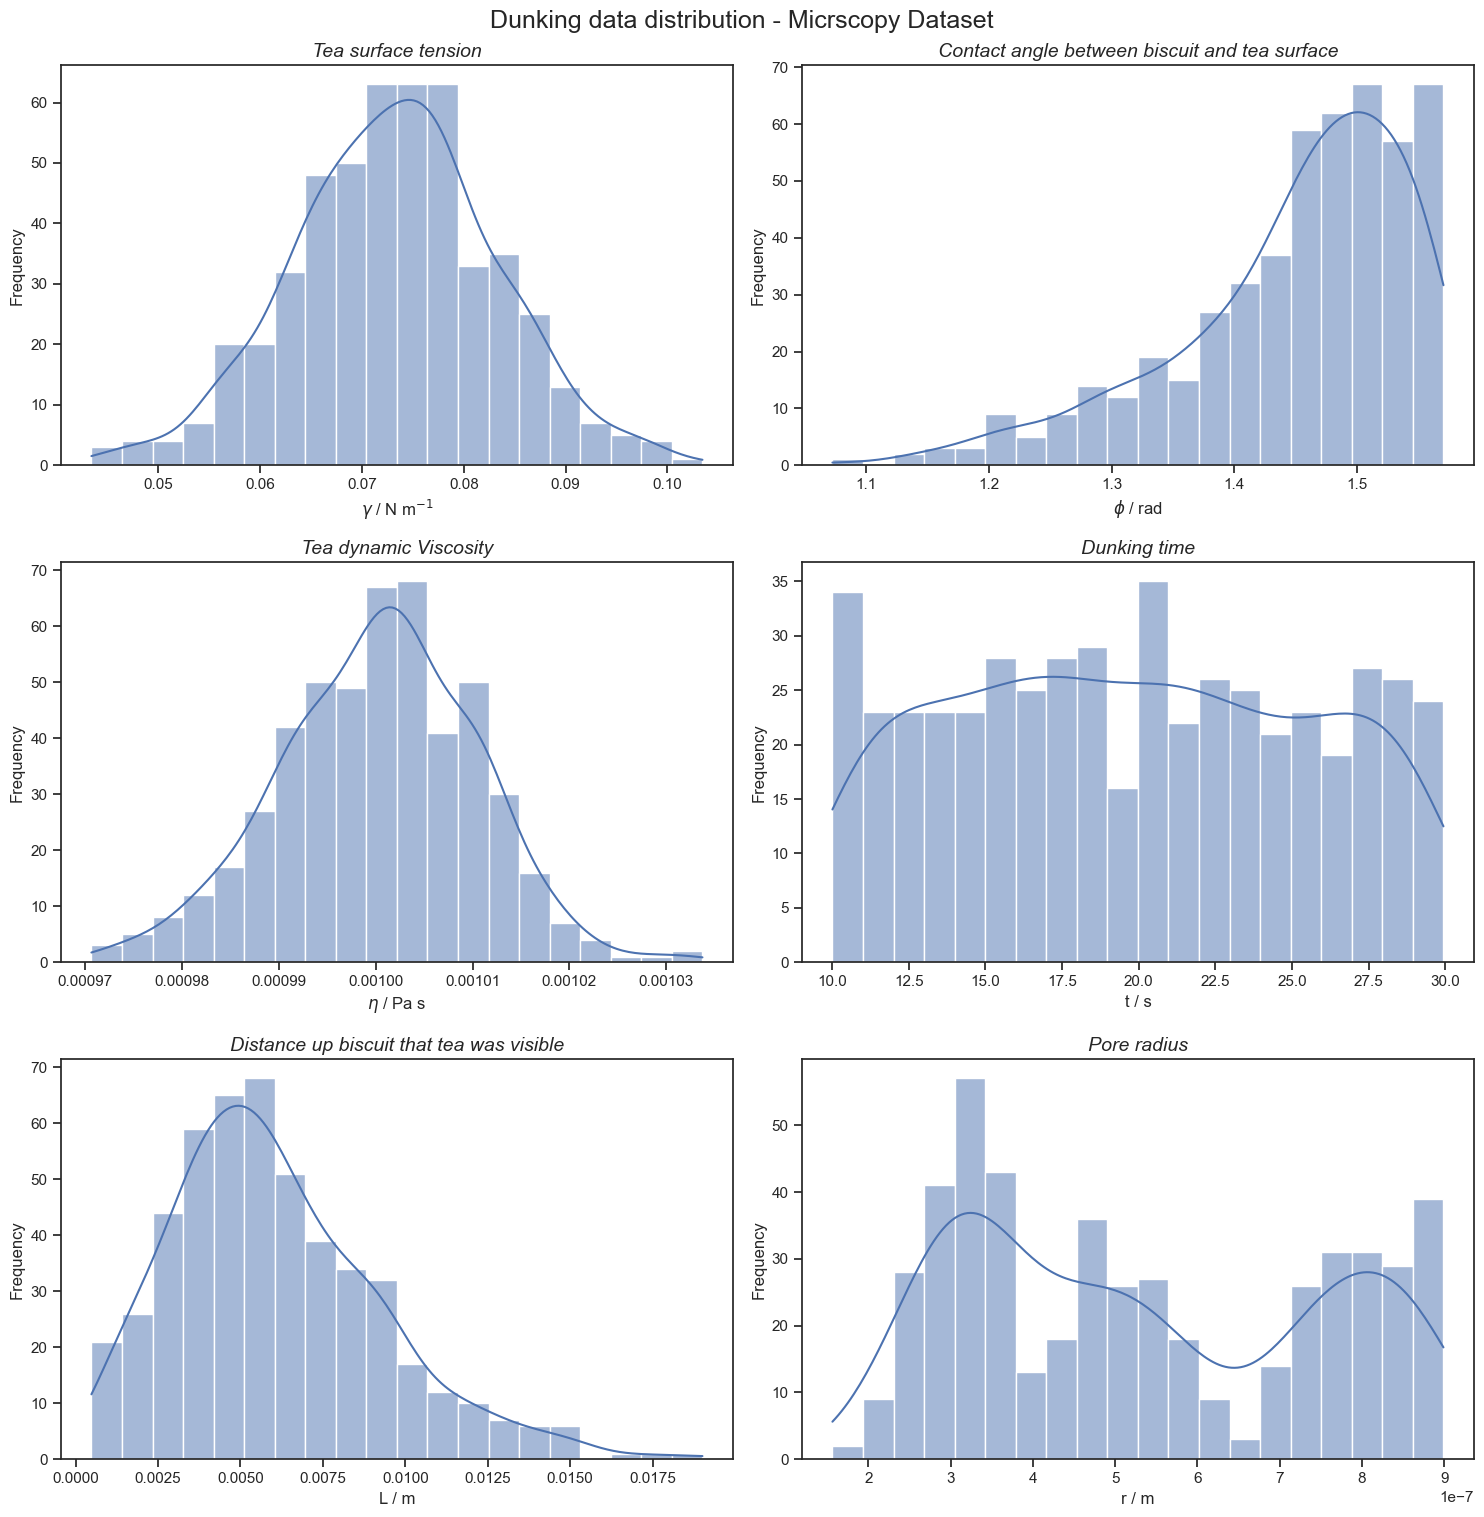

In [89]:
# exploring distribution of gamma (surface tension)
fig, ax = plt.subplots(3,2,figsize=(15,15))
sns.set_theme(style='ticks', font='Arial')

sns.histplot(data=microscopy_df, x='gamma', bins=20, kde=True, ax=ax[0,0])
ax[0,0].set_title('Tea surface tension', fontsize=14, fontstyle='italic')
ax[0,0].set_xlabel(r'$\gamma$ / N m$^{-1}$', fontsize=12)
ax[0,0].set_ylabel('Frequency', fontsize=12)

sns.histplot(data=microscopy_df, x='phi', bins=20, kde=True, ax=ax[0,1])
ax[0,1].set_title('Contact angle between biscuit and tea surface', fontsize=14, fontstyle='italic')
ax[0,1].set_xlabel(r'$\phi$ / rad', fontsize=12)
ax[0,1].set_ylabel('Frequency', fontsize=12)

sns.histplot(data=microscopy_df, x='eta', bins=20, kde=True, ax=ax[1,0])
ax[1,0].set_title('Tea dynamic Viscosity', fontsize=14, fontstyle='italic')
ax[1,0].set_xlabel(r'$\eta$ / Pa s', fontsize=12)
ax[1,0].set_ylabel('Frequency', fontsize=12)

sns.histplot(data=microscopy_df, x='t', bins=20, kde=True, ax=ax[1,1])
ax[1,1].set_title('Dunking time', fontsize=14, fontstyle='italic')
ax[1,1].set_xlabel('t / s', fontsize=12)
ax[1,1].set_ylabel('Frequency', fontsize=12)

sns.histplot(data=microscopy_df, x='L', bins=20, kde=True, ax=ax[2,0])
ax[2,0].set_title('Distance up biscuit that tea was visible', fontsize=14, fontstyle='italic')
ax[2,0].set_xlabel('L / m', fontsize=12)
ax[2,0].set_ylabel('Frequency', fontsize=12)

sns.histplot(data=microscopy_df, x='r', bins=20, kde=True, ax=ax[2,1])
ax[2,1].set_title('Pore radius', fontsize=14, fontstyle='italic')
ax[2,1].set_xlabel('r / m', fontsize=12)
ax[2,1].set_ylabel('Frequency', fontsize=12)

fig.tight_layout()
fig.suptitle('Dunking data distribution - Micrscopy Dataset', fontsize=18, y=1.01)

The variables within the microscopy dataset see the same distributions as the big dataset; this is because it is a subset. At first glance, the pore radius distribution appears random, however, upon further inspection there appears to be three distinct peaks (just above 3e<sup>-7</sup> m, just below 5e<sup>-7</sup> m and at 8e<sup>-7</sup> m). These likely correspond to the three biscuit types.

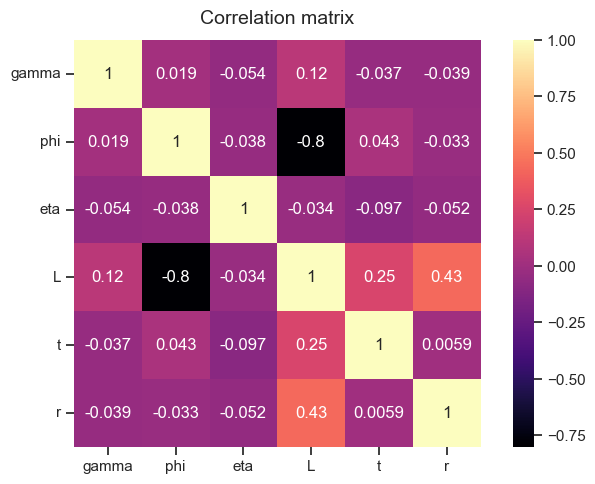

In [90]:
# exploring correlation between variables
corr = microscopy_df.corr()

fig, ax = plt.subplots(figsize=(7,5))
sns.set_theme(style='ticks', font='Arial')

sns.heatmap(corr, annot=True, cmap='magma', square=True)
ax.set_title('Correlation matrix', fontsize=14, y=1.02)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

fig.tight_layout()

The correlation matrix shows a positive correlation between *r* and *L*. The plot below the distribution; there appear to be three distinct groups of *r* values. The group with a mean aorund 8e<sup>-7</sup> m has a wider range of *L* values and so the initial hypothesis is that this corresponds to the digestive. This is explored later.

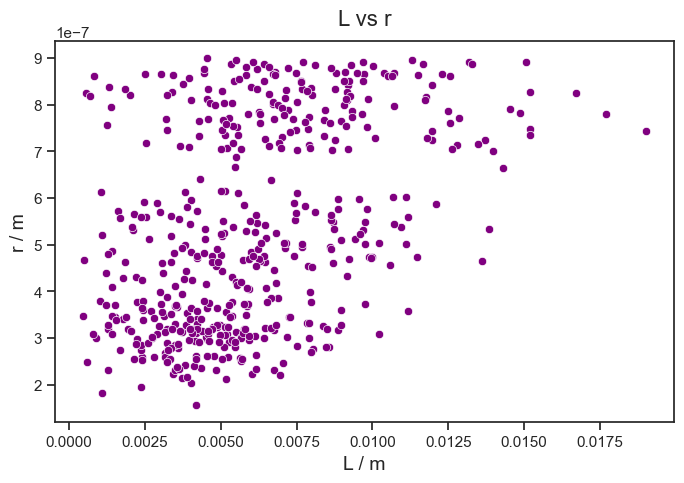

In [91]:
# plotting L vs r
fig, ax = plt.subplots(figsize=(7,5))
sns.set_theme(style='ticks', font='Arial')

sns.scatterplot(data=microscopy_df, x='L', y='r', c='purple')
ax.set_title('L vs r', fontsize=16, y=1.02)
ax.set_xlabel('L / m', fontsize=14)
ax.set_ylabel('r / m', fontsize=14)

fig.tight_layout()